<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [2]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [3]:
## Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [6]:
## Write your code here
missing=df.isnull().sum()

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



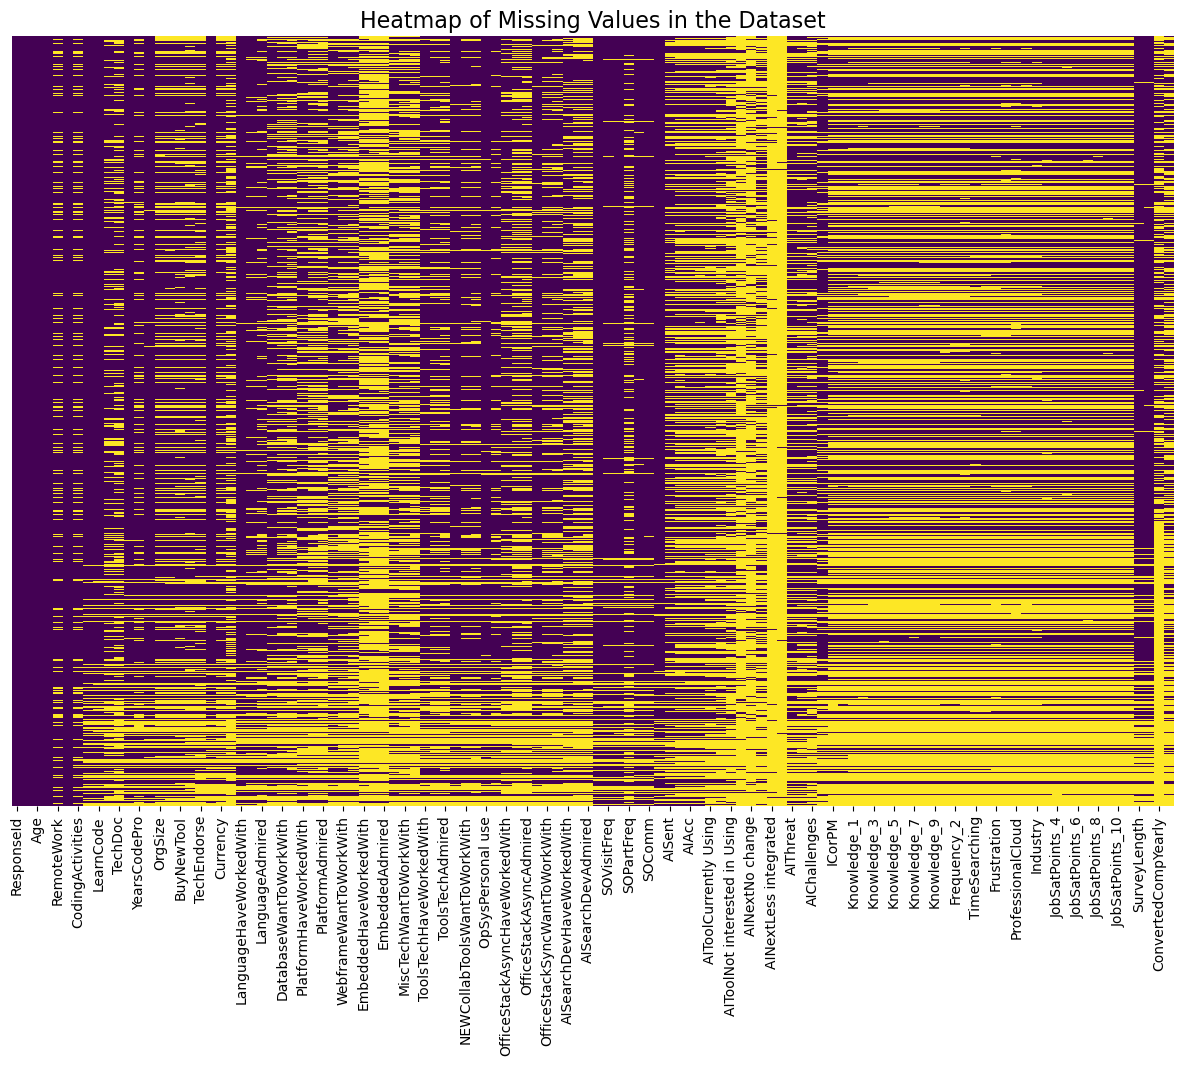

In [9]:
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title
plt.title('Heatmap of Missing Values in the Dataset', fontsize=16)
plt.show()

Yellow/bright areas = missing values (NaN)

Dark areas = present values

Columns with lots of bright space have more missing data.

This visualization gives a quick overview of where data is missing and helps in planning how to handle it.

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [18]:
df['Employment']

0        Employed, full-time
1        Employed, full-time
2        Employed, full-time
3         Student, full-time
4         Student, full-time
                ...         
65432    Employed, full-time
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436     Student, full-time
Name: Employment, Length: 65437, dtype: object

In [14]:
df['Employment'].isnull().sum()


0

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [15]:
## Write your code here
most_frequent=df['Employment'].mode()[0]

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [17]:
## Write your code here
most_frequent=df['Employment'].mode()[0]
df['Employment'].fillna(most_frequent)

0        Employed, full-time
1        Employed, full-time
2        Employed, full-time
3         Student, full-time
4         Student, full-time
                ...         
65432    Employed, full-time
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436     Student, full-time
Name: Employment, Length: 65437, dtype: object

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


C:\Users\43667\AppData\Local\Temp\ipykernel_12592\1709394870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='Set2')
C:\Users\43667\AppData\Local\Temp\ipykernel_12592\1709394870.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


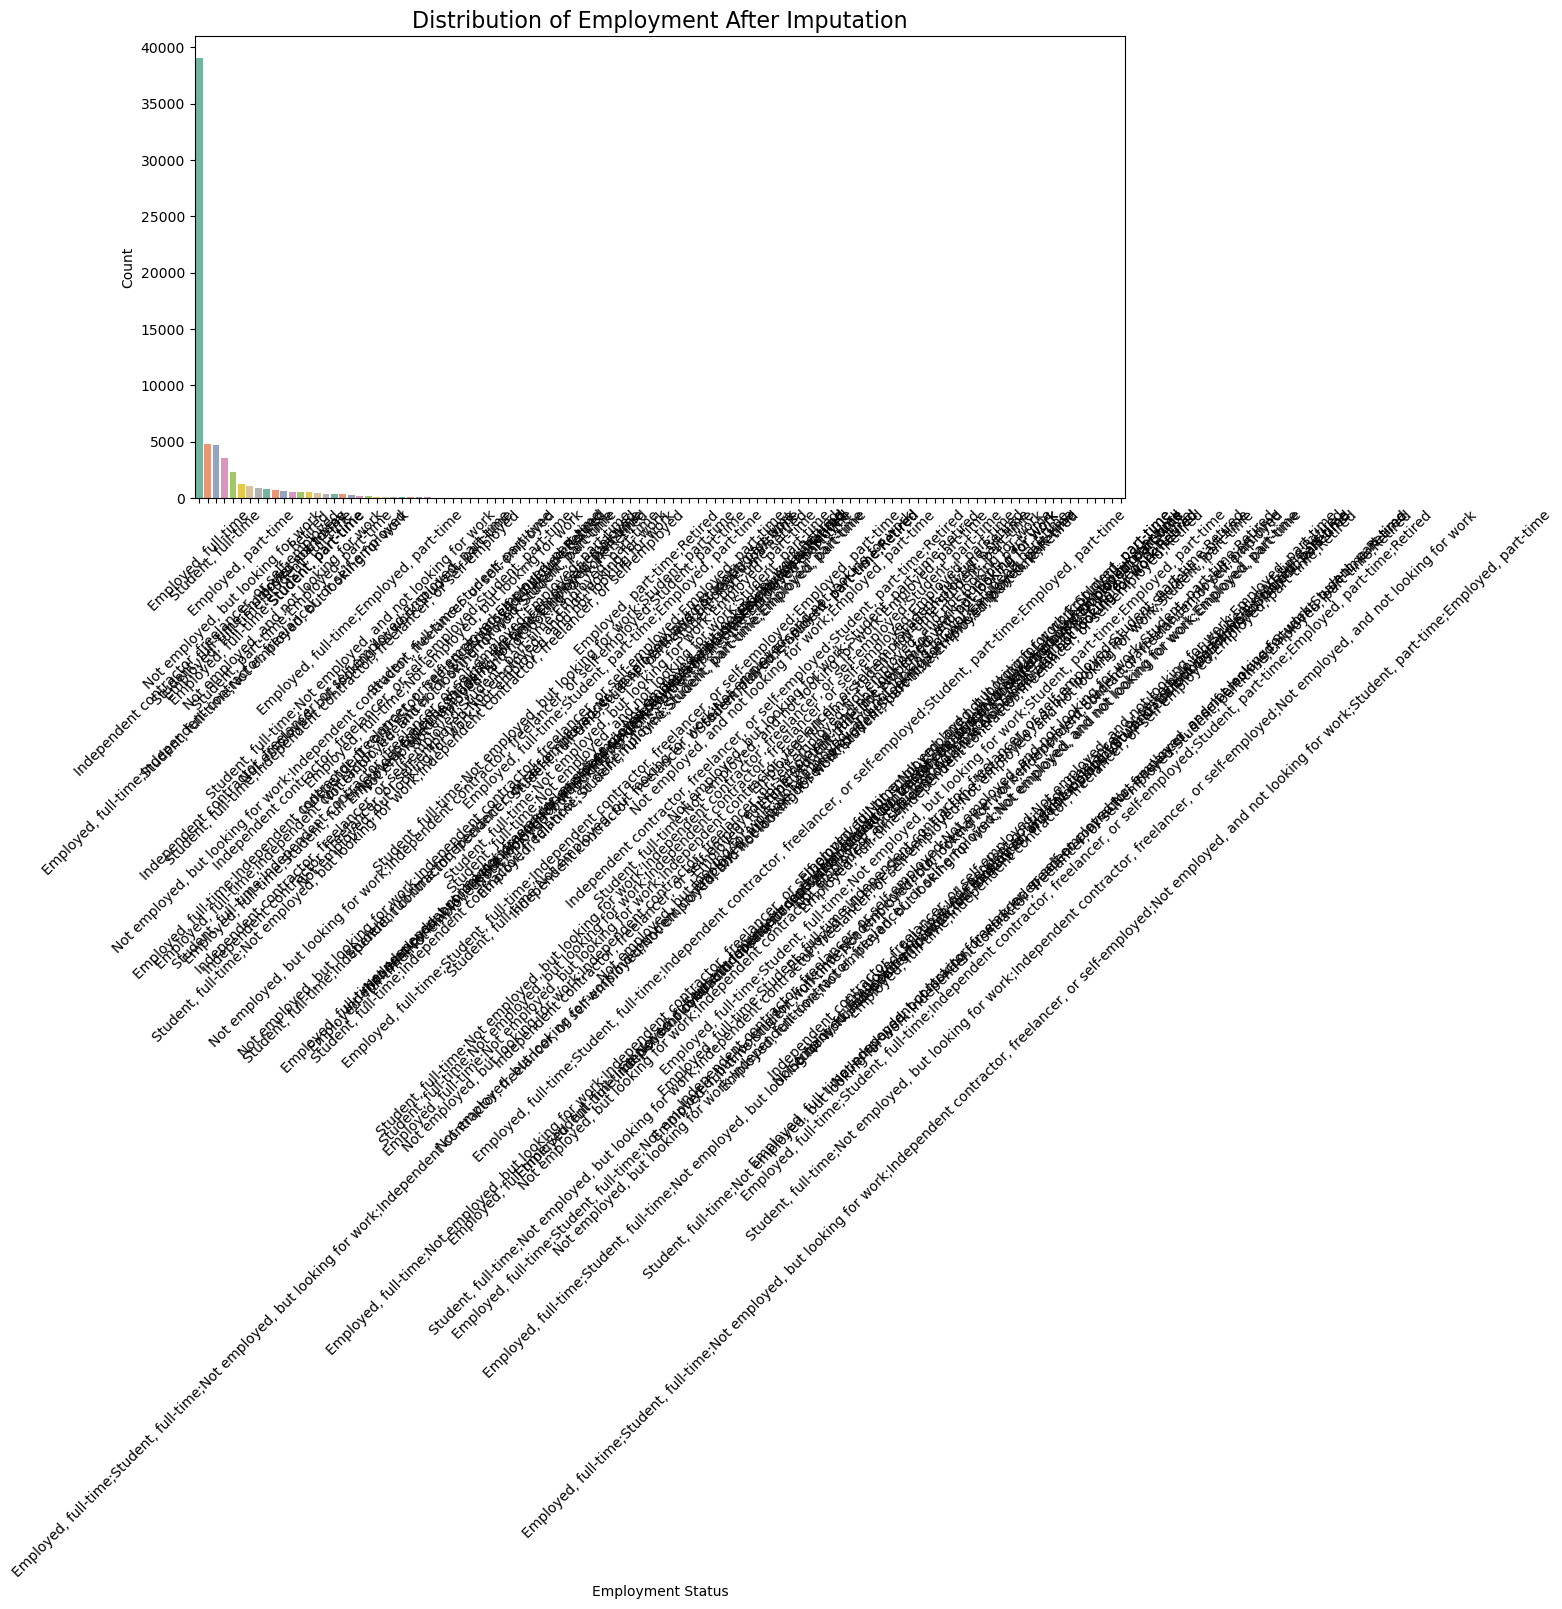

In [19]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='Set2')

plt.title('Distribution of Employment After Imputation', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.tight_layout()

C:\Users\43667\AppData\Local\Temp\ipykernel_12592\2643860420.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, y='Employment_clean', order=top_employment.index, palette='Set3')


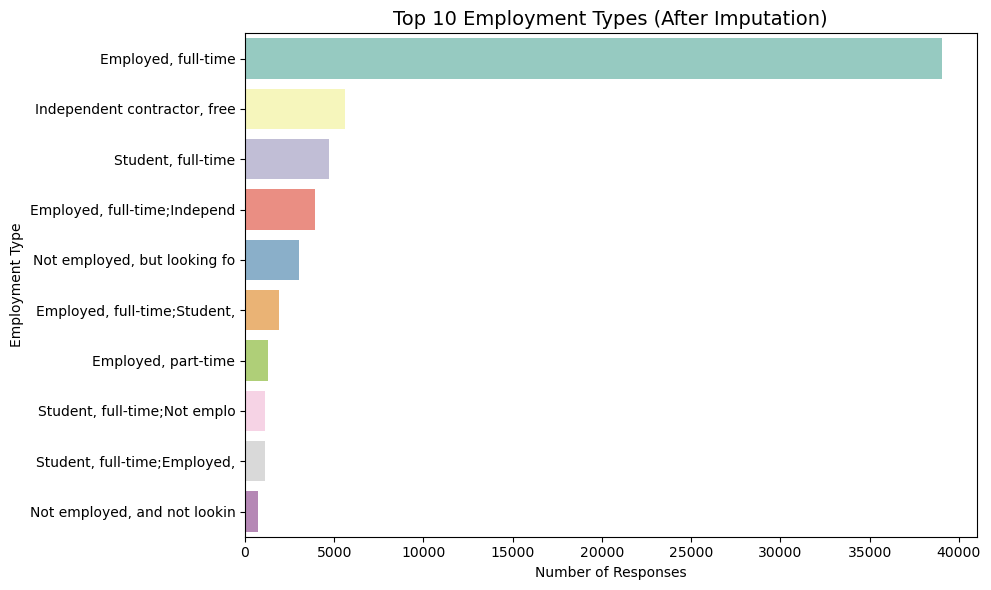

In [23]:

# Optional: shorten long labels
df['Employment_clean'] = df['Employment'].str.slice(0, 28)  # Limit each label to 28 characters

# Count top 10 most common employment types
top_employment = df['Employment_clean'].value_counts().nlargest(10)

# Filter the dataset for those top categories
df_top = df[df['Employment_clean'].isin(top_employment.index)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, y='Employment_clean', order=top_employment.index, palette='Set3')
plt.title("Top 10 Employment Types (After Imputation)", fontsize=14)
plt.xlabel("Number of Responses")
plt.ylabel("Employment Type")
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
